<a href="https://colab.research.google.com/github/mohamedalifaragitiai/Computer-Vision-Image_Processing/blob/main/Session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These codes are developed following Shamshad Ansari's image processing tutorials in his book "Building Computer Vision Applications Using Artificial Neural Networks": https://link.springer.com/book/10.1007/978-1-4842-5887-3

For more information and the rest of the notebooks used, please find them at https://github.com/Apress/building-computer-vision-apps-artificial-neural-networks

In [1]:
# log into drive from colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/AMIT/CVCourse/images 


/content/drive/MyDrive/AMIT/CVCourse/images


In [3]:
!ls

'1*fXxDBsJ96FKEtMOa9vNgjA.gif'	   einstein.jpg    mri.png	 tea.jpg
'1*fXxDBsJ96FKEtMOa9vNgjA.gif.1'   etretat.jpg	   nature.jpg	 walking.jpg
 airplane.jpg			   eye.jpg	   park.png	 worldCup.jpg
 camera.jpg			   j.png	   pooling.gif	 zebra.jpg
 cat1.png			   marsRover.jpg   Qatar.png	 zebrasmall.png
 cat2.png			   marsrover.png   soccer.jpg


**Import Libraries**

In [4]:
from __future__ import print_function
import cv2, matplotlib.pyplot as plt
import numpy as np
from google.colab import files

**Read Image**


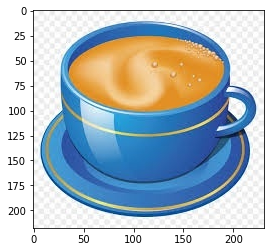

In [5]:
image_path = 'tea.jpg'
image = cv2.imread(image_path)
plt.imshow(image[:,:,::-1])

In [6]:
print(image)

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [241 241 241]
  [243 243 243]
  [243 243 243]]

 [[254 254 254]
  [254 254 254]
  [255 255 255]
  ...
  [237 237 237]
  [239 239 239]
  [240 240 240]]

 [[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [232 232 232]
  [235 235 235]
  [237 237 237]]

 ...

 [[235 235 235]
  [235 235 235]
  [236 236 236]
  ...
  [251 251 251]
  [252 252 252]
  [254 254 254]]

 [[240 240 240]
  [238 238 238]
  [236 236 236]
  ...
  [253 253 253]
  [252 252 252]
  [253 253 253]]

 [[240 240 240]
  [238 238 238]
  [236 236 236]
  ...
  [253 253 253]
  [252 252 252]
  [253 253 253]]]


In [7]:
image.shape

(218, 231, 3)

**Writing/Saving Image**

In [8]:

cv2.imwrite('tea.jpg',image)


True

In [9]:
files.download('tea.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Convert RGB to GrayScale**

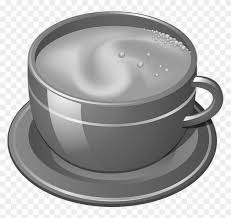

In [10]:
from google.colab.patches import cv2_imshow

grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)


In [11]:
print(grayscale)

[[253 253 253 ... 241 243 243]
 [254 254 255 ... 237 239 240]
 [254 255 255 ... 232 235 237]
 ...
 [235 235 236 ... 251 252 254]
 [240 238 236 ... 253 252 253]
 [240 238 236 ... 253 252 253]]


In [12]:
grayscale.max()

255

In [13]:
grayscale.min()

13

**Image Details**

Image Dimensions: 3
Image Height: 218
Image Width: 231
Image Channels: 3
Size of Image Array: 151074


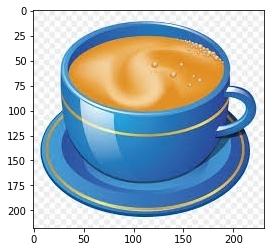

In [14]:
image_path = 'tea.jpg'
image = cv2.imread(image_path)
print(f'Image Dimensions: {image.ndim}')
print(f'Image Height: {image.shape[0]}')
print(f'Image Width: {image.shape[1]}')
print(f'Image Channels: {image.shape[2]}')
print(f'Size of Image Array: {image.size}')

_ = plt.imshow(image[:,:,::-1])

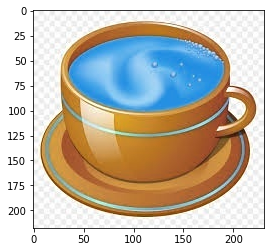

In [15]:
plt.imshow(image)

**Image Translation**

In [16]:
image.shape[1]
image.shape[0]

218

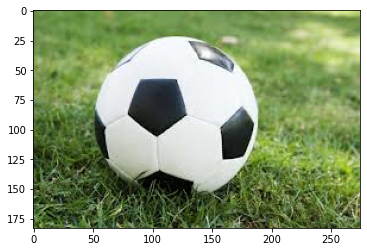

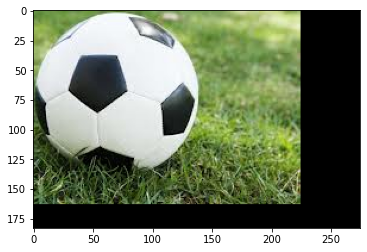

In [17]:
image = cv2.imread('soccer.jpg')

translationMatrix = np.float32([[1,0,-50],[0,1,-20]])
movedImage = cv2.warpAffine(image, translationMatrix, (image.shape[1], image.shape[0]))
plt.imshow(image[:,:,::-1])
plt.show()
plt.imshow(movedImage[:,:,::-1])
plt.show()

**Image Rotation**

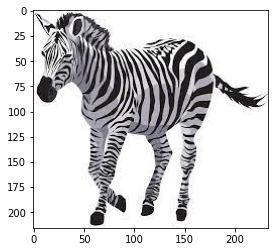

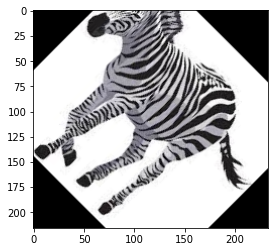

In [18]:
image = cv2.imread('zebra.jpg')
h, w = image.shape[:2]
center = w // 2, h // 2
angle = -45
scale = 1.0
rotationMatrix = cv2.getRotationMatrix2D(center, angle, scale)
rotatedImage = cv2.warpAffine(image, rotationMatrix, (image.shape[1], image.shape[0]))
plt.imshow(image[:,:,::-1])
plt.show()
plt.imshow(rotatedImage[:,:,::-1])

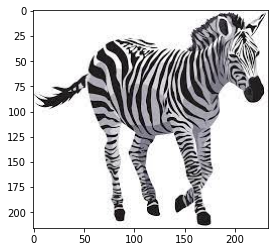

In [19]:
flippedHorizontally = cv2.flip(image, 1)
plt.imshow(flippedHorizontally[:,:,::-1])

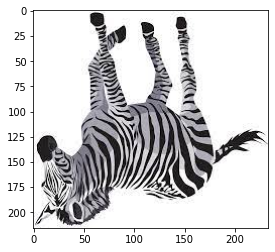

In [20]:
flippedVertically = cv2.flip(image, 0)
plt.imshow(flippedVertically[:,:,::-1])

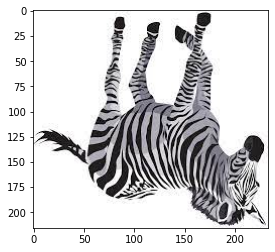

In [21]:
flippedVertically = cv2.flip(image, -1)
plt.imshow(flippedVertically[:,:,::-1])

**Coloring a spacific area in the image**

Blue, Green and Red values at (0, 0):  (40, 55, 134)


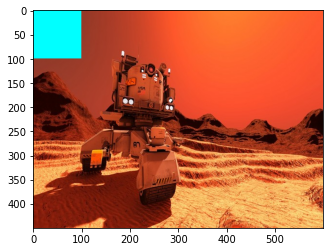

In [22]:
image_path = 'marsRover.jpg'
image = cv2.imread(image_path)
b, g, r = image[0, 0]
print('Blue, Green and Red values at (0, 0): ', format((b, g, r)))
image[0:100, 0:100] = (255, 255, 0)
_ = plt.imshow(image[:,:,::-1])

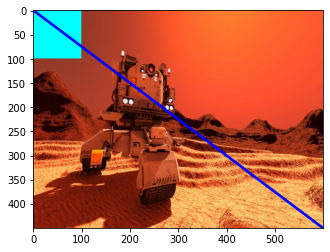

In [23]:
start = (0, 0)
end = (image.shape[1], image.shape[0])
color = (255, 0, 0)
thickness = 4
cv2.line(image, start, end, color, thickness)
plt.imshow(image[:,:,::-1])

**Drawing a sahpe in the image**

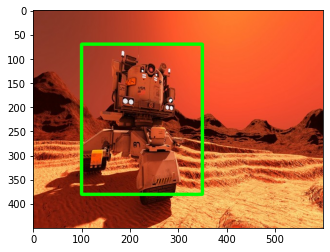

In [24]:
image = cv2.imread('marsRover.jpg')
start = 100, 70
end = 350, 380
color = 0, 255, 0
thickness = 5
cv2.rectangle(image, start, end, color, thickness)
_ = plt.imshow(image[:,:,::-1])

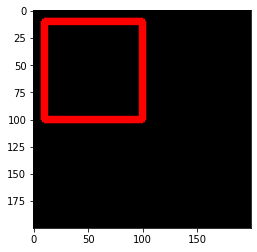

In [25]:
import numpy as np
canvas = np.zeros((200, 200, 3), dtype = 'uint8')
start = 10, 10
end = 100, 100
color = 0, 0, 255
thickness = 5
cv2.rectangle(canvas, start, end, color, thickness)
_ = plt.imshow(canvas[:,:,::-1])

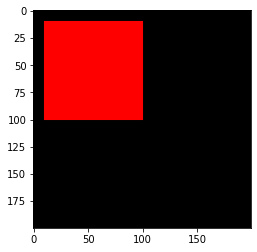

In [26]:
import numpy as np

canvas = np.zeros((200, 200, 3), dtype = 'uint8')
start = 10, 10
end = 100, 100
color = 0, 0, 255
thickness = -1
cv2.rectangle(canvas, start, end, color, thickness)
_ = plt.imshow(canvas[:,:,::-1])

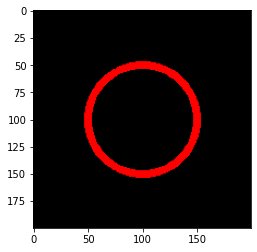

In [27]:
canvas = np.zeros((200, 200, 3), dtype = 'uint8')
center = 100, 100
radius = 50
color = 0, 0, 255
thickness = 5
cv2.circle(canvas, center, radius, color, thickness)
plt.imshow(canvas[:,:,::-1])

**Image Cropping**

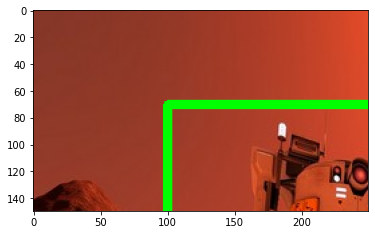

In [28]:
croppedImage = image[0:150, 0:250]
plt.imshow(croppedImage[:,:,::-1])

**Image Pooling Max and Mverage**

In [54]:
!wget https://miro.medium.com/max/1400/1*fXxDBsJ96FKEtMOa9vNgjA.gif

--2022-12-15 20:07:14--  https://miro.medium.com/max/1400/1*fXxDBsJ96FKEtMOa9vNgjA.gif
Resolving miro.medium.com (miro.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9904, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141739 (138K) [image/gif]
Saving to: ‘1*fXxDBsJ96FKEtMOa9vNgjA.gif.2’

1*fXxDBsJ96FKEtMOa9 100%[===================>] 138.42K  --.-KB/s    in 0.01s   

2022-12-15 20:07:14 (13.4 MB/s) - ‘1*fXxDBsJ96FKEtMOa9vNgjA.gif.2’ saved [141739/141739]



In [55]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1400/1*fXxDBsJ96FKEtMOa9vNgjA.gif')

**Image Resizing**

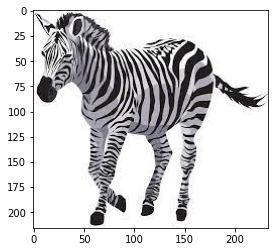

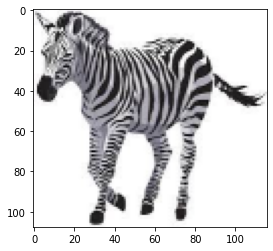

In [29]:
image = cv2.imread('zebra.jpg')
h, w = image.shape[:2]
aspect = w / h
height = h // 2
width = int(height * aspect)
dimension = width, height
resizedImage = cv2.resize(image, dimension, interpolation = cv2.INTER_AREA)
plt.imshow(image[:,:,::-1])
plt.show()
plt.imshow(resizedImage[:,:,::-1])
plt.show()

**Image Interplolation**

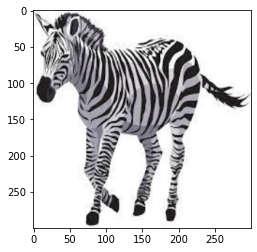

In [30]:
# a bilinear interpolation (used by default)
resizedImage1 = cv2.resize(image, (300, 300), interpolation = cv2.INTER_LINEAR)
plt.imshow(resizedImage1[:,:,::-1])
plt.show()

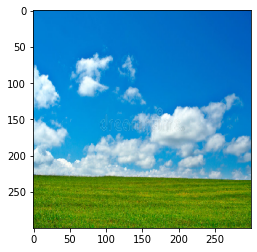

In [31]:
# a nearest-neighbor interpolation
image = cv2.imread('nature.jpg')
resizedImage1 = cv2.resize(image, (300, 300), interpolation = cv2.INTER_NEAREST)
plt.imshow(resizedImage1[:,:,::-1])
plt.show()

(533, 800, 3)


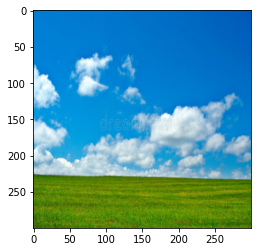

In [32]:
#resampling using pixel area relation. It may be a preferred method for image decimation, as it gives 
#moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.
image = cv2.imread('nature.jpg')
print(image.shape)
resizedImage1 = cv2.resize(image, (300, 300), interpolation = cv2.INTER_AREA)
plt.imshow(resizedImage1[:,:,::-1])
plt.show()

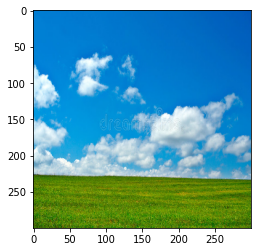

In [33]:
# a bicubic interpolation over 4×4 pixel neighborhood
resizedImage1 = cv2.resize(image, (300, 300), interpolation = cv2.INTER_CUBIC)
plt.imshow(resizedImage1[:,:,::-1])
plt.show()
 

**Image Adding**

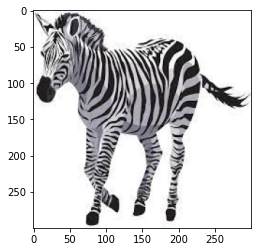

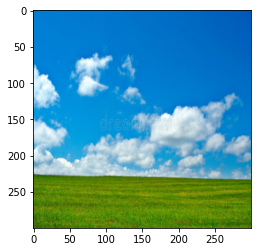

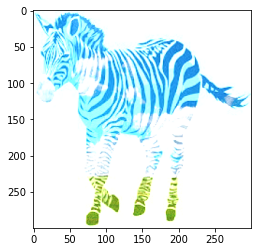

In [34]:
image1 = cv2.imread('zebra.jpg')
image2 = cv2.imread('nature.jpg')
resizedImage1 = cv2.resize(image1, (300, 300), interpolation = cv2.INTER_AREA)
resizedImage2 = cv2.resize(image2, (300, 300), interpolation = cv2.INTER_AREA)
resultant = cv2.add(resizedImage1, resizedImage2)
plt.imshow(resizedImage1[:,:,::-1])
plt.show()
plt.imshow(resizedImage2[:,:,::-1])
plt.show()
plt.imshow(resultant[:,:,::-1])
plt.show()



**Image weights exchange**

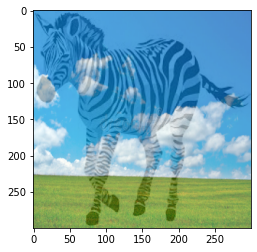

In [35]:
weightedImage = cv2.addWeighted(resizedImage1, 0.3, resizedImage2, 0.7, 0)
plt.imshow(weightedImage[:,:,::-1])
plt.show()



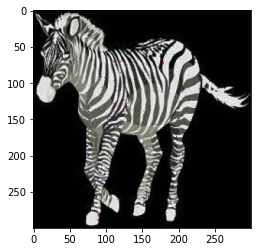

In [36]:
enhancedImage = 255 * resizedImage1
plt.imshow(enhancedImage[:,:,::-1])
plt.show()



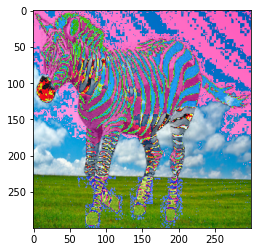

In [37]:
arrayImage = resizedImage1 + resizedImage2
plt.imshow(arrayImage[:,:,::-1])
plt.show()

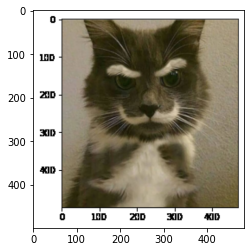

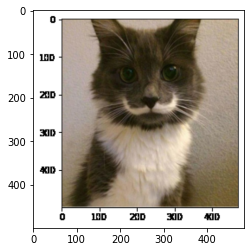

In [38]:
image1 = cv2.imread('cat1.png')
h, w = image1.shape[:2]
aspect = w / h
h_new = 500
w_new = int(h_new * aspect)
resizedImage1 = cv2.resize(image1, (w_new, h_new), interpolation = cv2.INTER_AREA)

plt.imshow(resizedImage1[:,:,::-1])
plt.show()

###########################################

image2 = cv2.imread('cat2.png')
h, w = image2.shape[:2]
aspect = w / h
h_new = 500
w_new = int(h_new * aspect)
resizedImage2 = cv2.resize(image2, (w_new, h_new), interpolation = cv2.INTER_AREA)

plt.imshow(resizedImage2[:,:,::-1])
plt.show()

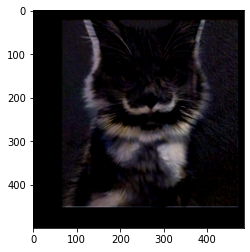

In [39]:
image21_subbed = cv2.subtract(resizedImage2, resizedImage1)
plt.imshow(image21_subbed[:,:,::-1])

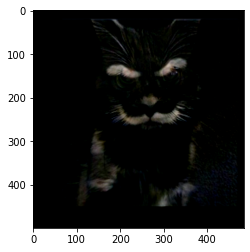

In [40]:
image12_subbed = cv2.subtract(resizedImage1, resizedImage2)
plt.imshow(image12_subbed[:,:,::-1])

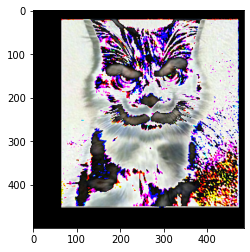

In [41]:
image12_subbed = resizedImage1 - resizedImage2
plt.imshow(image12_subbed[:,:,::-1])

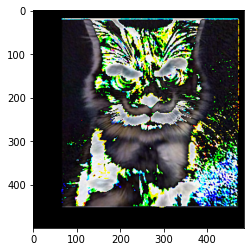

In [42]:
image21_subbed = resizedImage2 - resizedImage1
plt.imshow(image21_subbed[:,:,::-1])

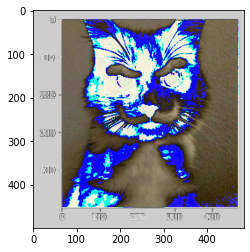

In [43]:
image_subbed = resizedImage1 - 50
plt.imshow(image_subbed[:,:,::-1])

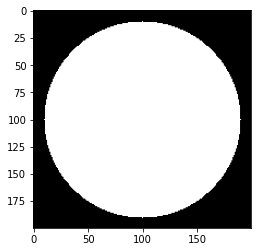

In [44]:
circle = cv2.circle(np.zeros((200, 200, 3), dtype = 'uint8'), 
                    (100, 100),
                    90,
                    (255,255,255),
                    -1)
plt.imshow(circle[:,:,::-1])

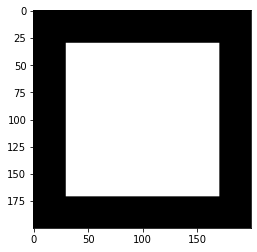

In [45]:
square = cv2.rectangle(np.zeros((200,200,3), dtype = 'uint8'),
                       (30, 30),
                       (170, 170),
                       (255,255,255),
                       -1)
plt.imshow(square)

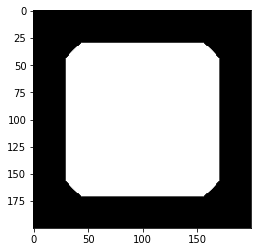

In [46]:
plt.imshow(cv2.bitwise_and(square, circle)[:,:,::-1])

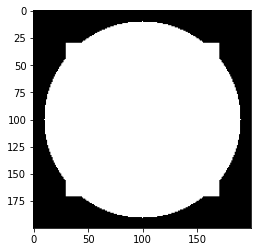

In [47]:
plt.imshow(cv2.bitwise_or(square, circle)[:,:,::-1])

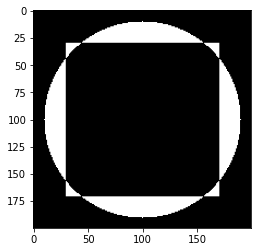

In [48]:
plt.imshow(cv2.bitwise_xor(square, circle)[:,:,::-1])

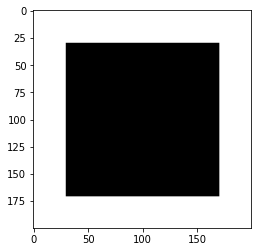

In [49]:
plt.imshow(cv2.bitwise_not(square)[:,:,::-1])

**Masking Imges**

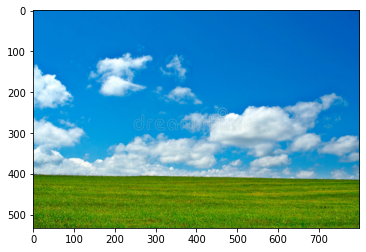

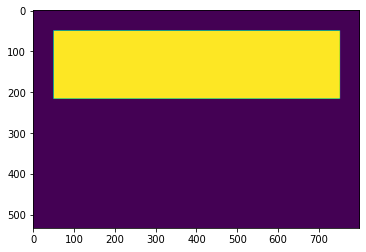

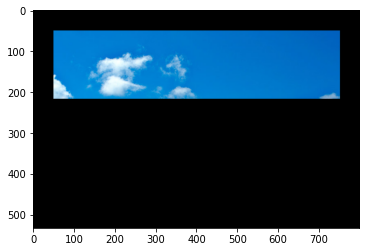

In [51]:
natureImage = cv2.imread('nature.jpg')
plt.imshow(natureImage[:,:,::-1])
plt.show()

maskImage = cv2.rectangle(np.zeros(natureImage.shape[:2], dtype = 'uint8'),
                          (50,50),
                          (natureImage.shape[1]-50, int(natureImage.shape[0] / 2) - 50),
                          (255,255,255), -1)
plt.imshow(maskImage)
plt.show()

masked = cv2.bitwise_and(natureImage, natureImage, mask = maskImage)
plt.imshow(masked[:,:,::-1])

**Splitting and Merging Images**

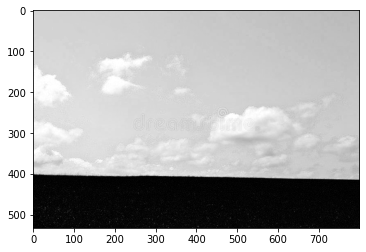

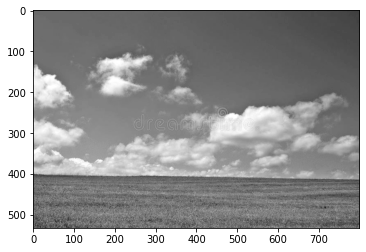

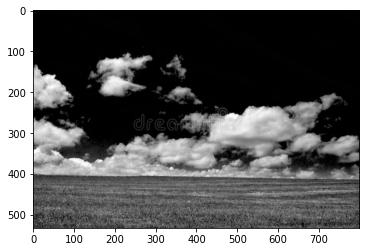

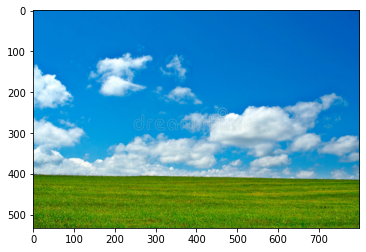

In [52]:
b, g, r = cv2.split(natureImage)

plt.imshow(b, 'gray')
plt.show()
plt.imshow(g, 'gray')
plt.show()
plt.imshow(r, 'gray')
plt.show()

merged = cv2.merge([b,g,r])
plt.imshow(merged[:,:,::-1])
plt.show()

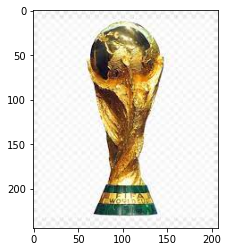

In [53]:
cup = cv2.imread('worldCup.jpg')
plt.imshow(cup[:,:,::-1])
plt.show()



**RGB and HSV**

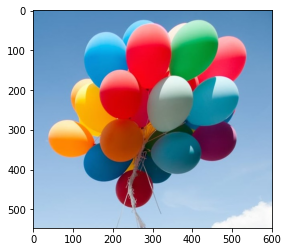

In [69]:
from google.colab.patches import cv2_imshow
image = cv2.imread('balloons.jpg')  # BGR

plt.imshow(image[:,:,::-1])
plt.show()


**RGB**

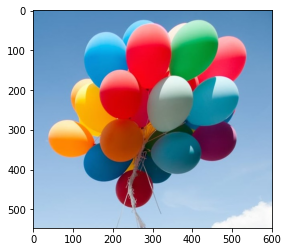

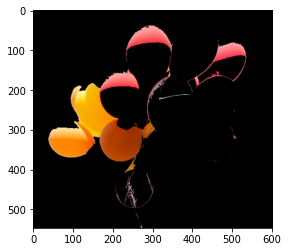

In [70]:

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB
channels = cv2.split(image_rgb)

plt.imshow(image[:,:,::-1])
plt.show()
lower_rgb = np.array([145, 45, 0])
upper_rgb = np.array([255, 255, 167])

mask = cv2.inRange(image_rgb, lower_rgb, upper_rgb)
masked_rgb = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(masked_rgb[:,:,::-1])
plt.show()





**HSV**

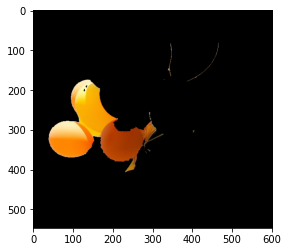

In [71]:

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # HSV
def hsv_from(rgb_value):
    rgb = np.uint8([[list(rgb_value)]])
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    return hsv[0][0][0]


lower_hsv = np.array([hsv_from(lower_rgb), 50, 50])
upper_hsv = np.array([hsv_from(upper_rgb), 255, 255])


mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
masked_hsv = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(masked_hsv[:,:,::-1])
plt.show()
